In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [6]:
# data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(x.size()))

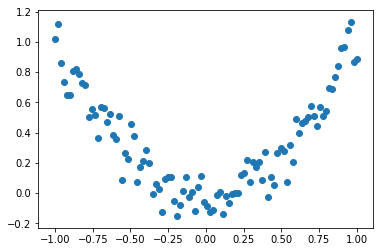

In [10]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [12]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [14]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [15]:
# different nets
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()

In [16]:
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [17]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Mometum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Mometum, opt_RMSprop, opt_Adam]

In [19]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]

In [25]:
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(batch_x)
            loss = loss_func(output, batch_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.numpy())

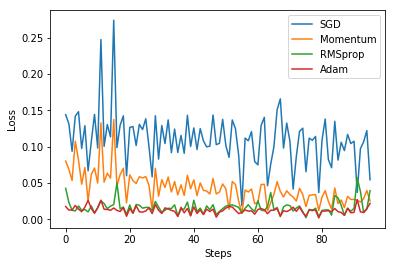

In [27]:
# plot
labels = ["SGD", "Momentum", "RMSprop", "Adam"]
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc="best")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()